In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import Dataset

In [2]:
taxi_df = pd.read_parquet("data/yellow_taxi_tripdata_2022-01.parquet")
taxi_data = pd.concat([taxi_df])
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [3]:
taxi_data.shape

(2463931, 19)

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                       'trip_distance', 'RatecodeID', 'payment_type', 'PULocationID',
                       'DOLocationID', 'total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,1,142,236,21.95
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,1,236,42,13.30
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,1,166,166,10.56
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,2,114,68,11.80
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,1,68,163,30.30


# 2. Data Exploration

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

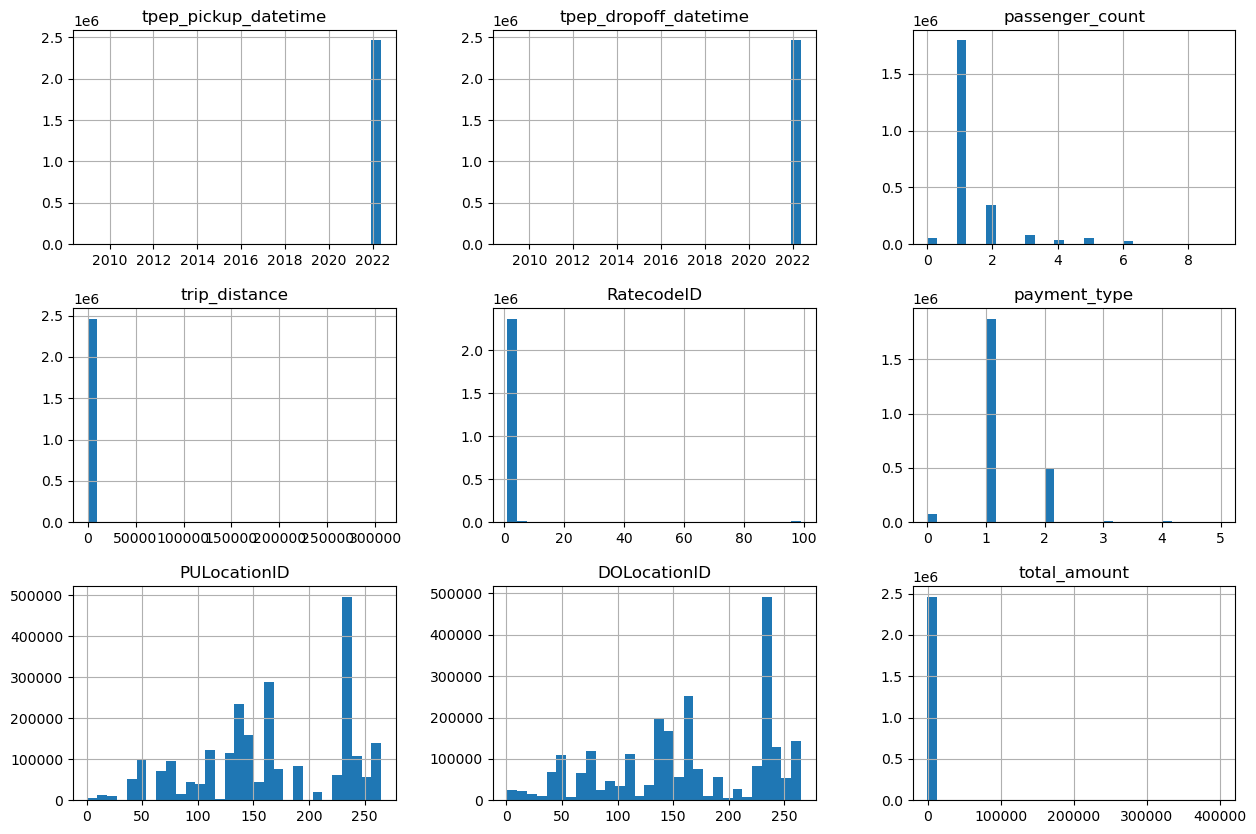

In [6]:
taxi_data.hist(figsize=(15,10), bins=30)

In [7]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2296363
2.0       66623
5.0       13561
99.0       8732
3.0        4014
4.0        3118
6.0          17
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

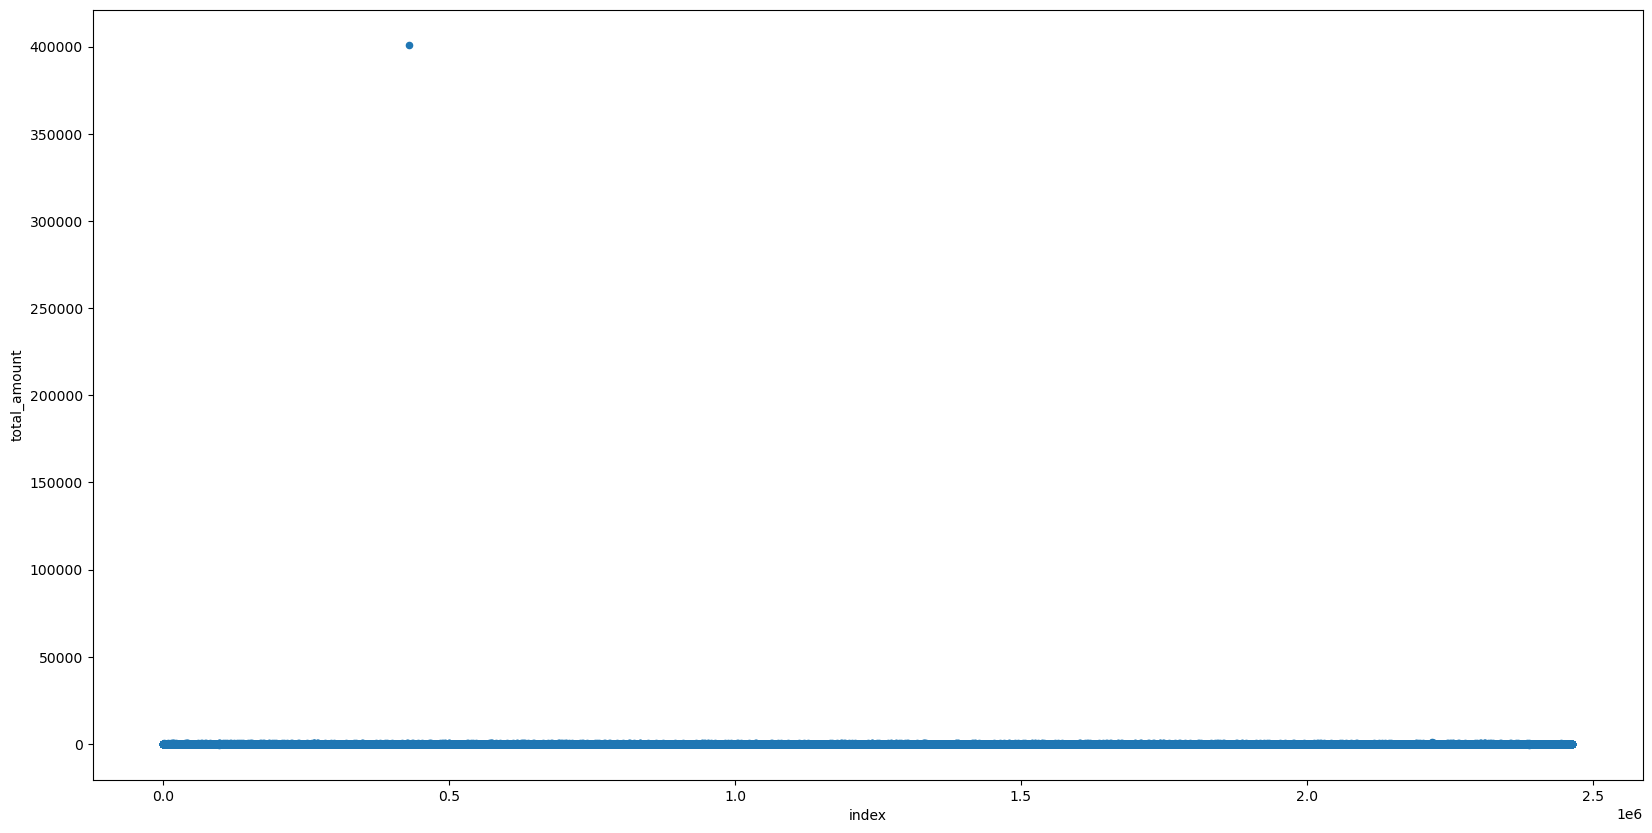

In [8]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

<Axes: xlabel='index', ylabel='total_amount'>

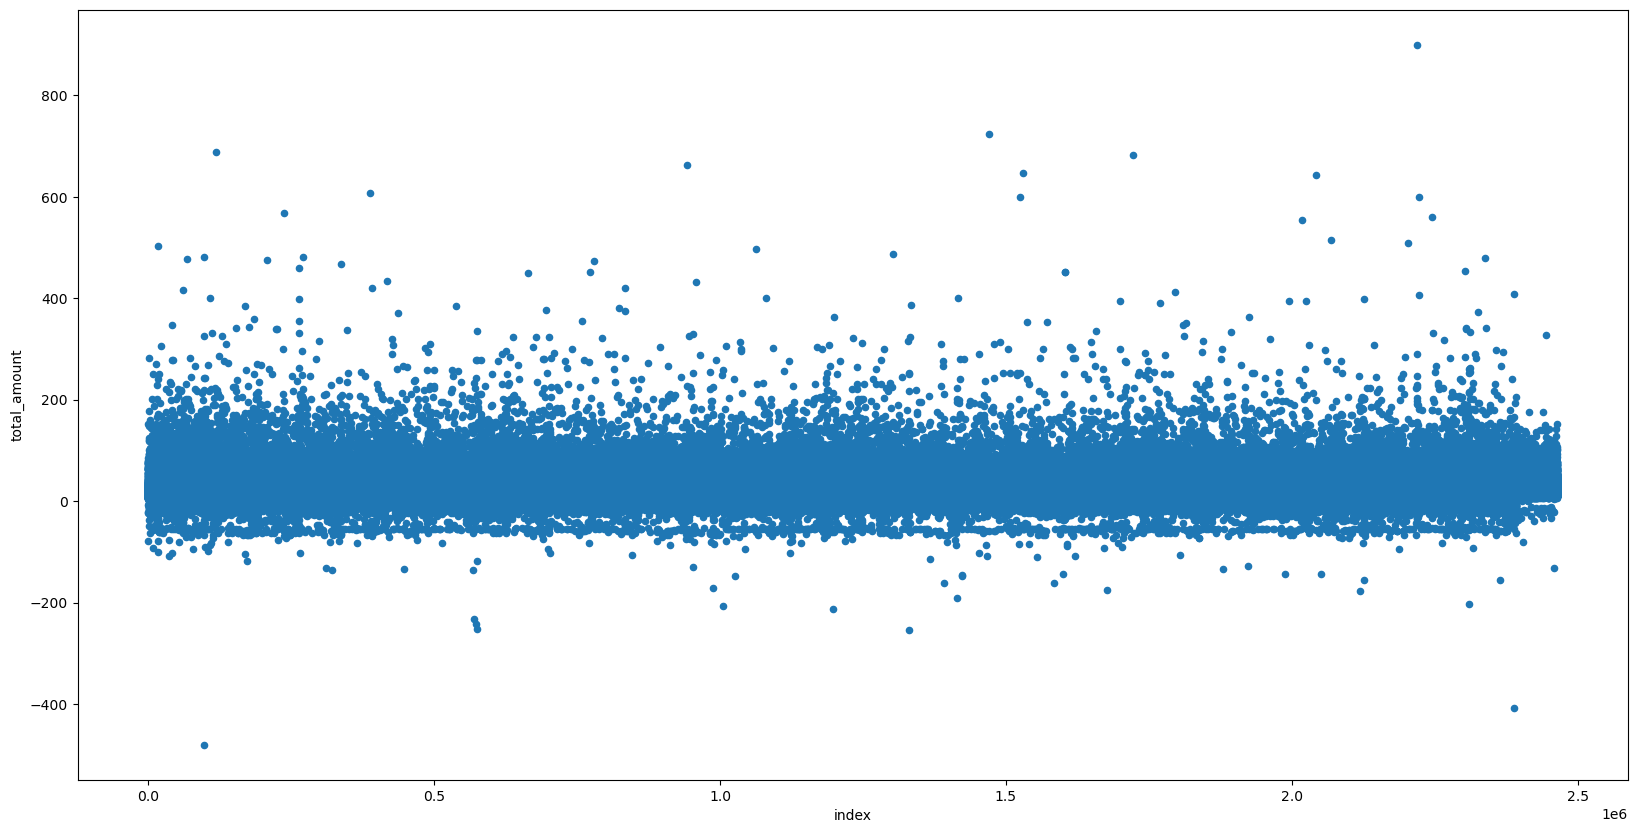

In [9]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

(12934, 9)


<Axes: xlabel='index', ylabel='total_amount'>

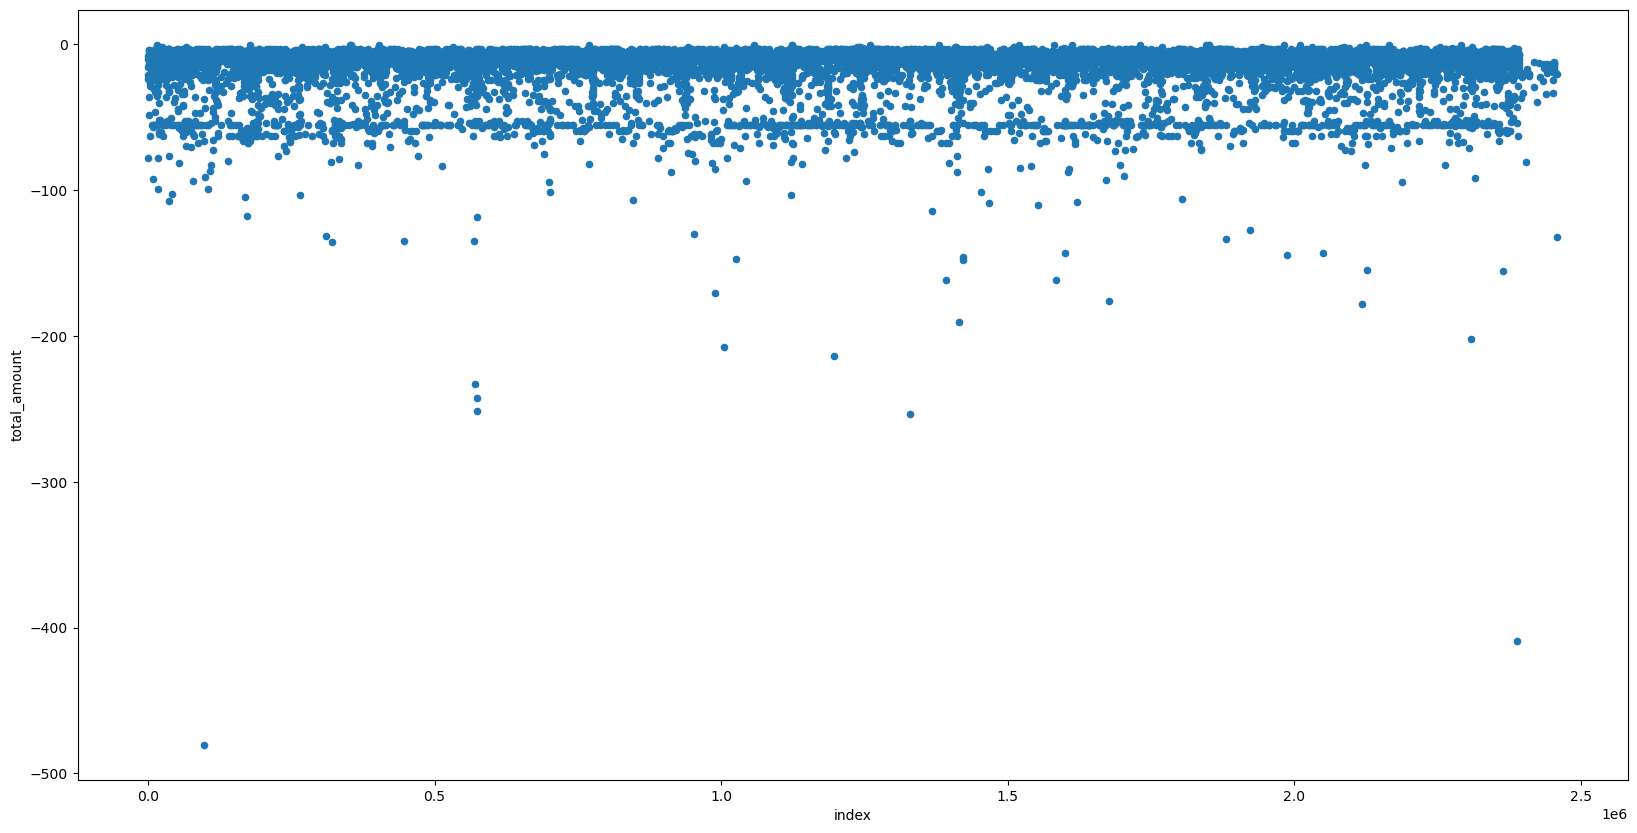

In [10]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

In [11]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
154,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,4,132,265,-23.55
521,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,4,152,48,-20.80
523,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,2,50,265,-77.80
580,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,2,90,234,-7.80
714,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,4,13,246,-15.80


In [12]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    7384
3    3221
2    2287
0      37
1       5
Name: count, dtype: int64

<Axes: >

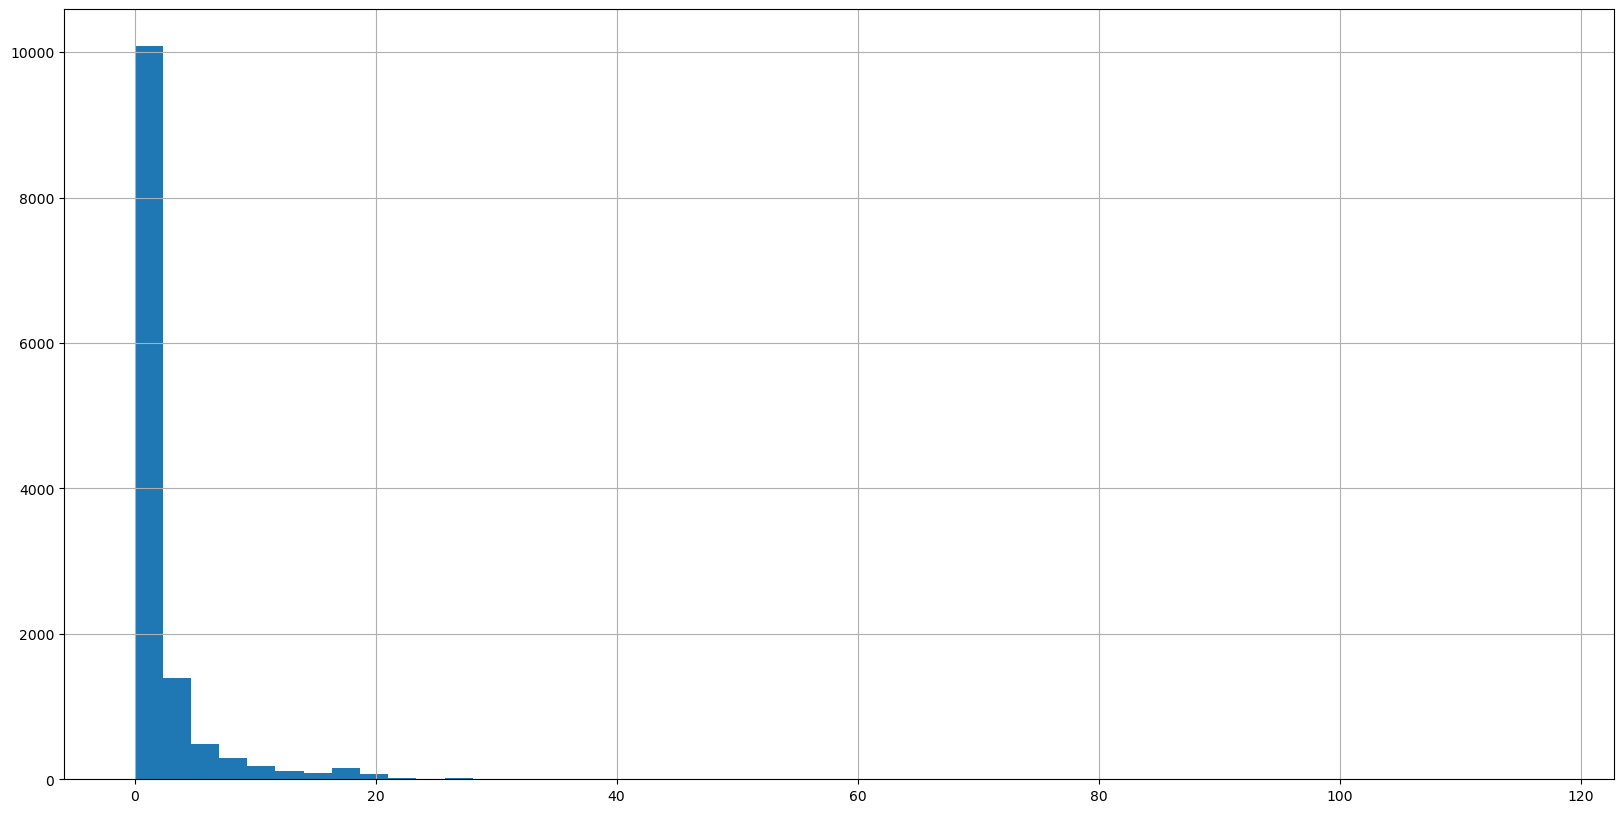

In [13]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 50, figsize = (20,10))

In [14]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(474, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
10065,2022-01-01 02:46:39,2022-01-01 03:31:48,1.0,0.0,1.0,1,61,61,0.0
10171,2022-01-01 02:34:04,2022-01-01 02:34:16,2.0,0.0,2.0,3,132,132,0.0
30840,2022-01-01 13:29:52,2022-01-01 13:30:08,1.0,0.0,1.0,2,193,193,0.0
34114,2022-01-01 13:43:34,2022-01-01 13:43:47,1.0,0.0,1.0,1,193,193,0.0
53758,2022-01-01 20:13:17,2022-01-01 20:13:17,1.0,0.0,5.0,2,263,264,0.0


In [15]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    293
2     71
4     61
3     46
0      3
Name: count, dtype: int64

<Axes: >

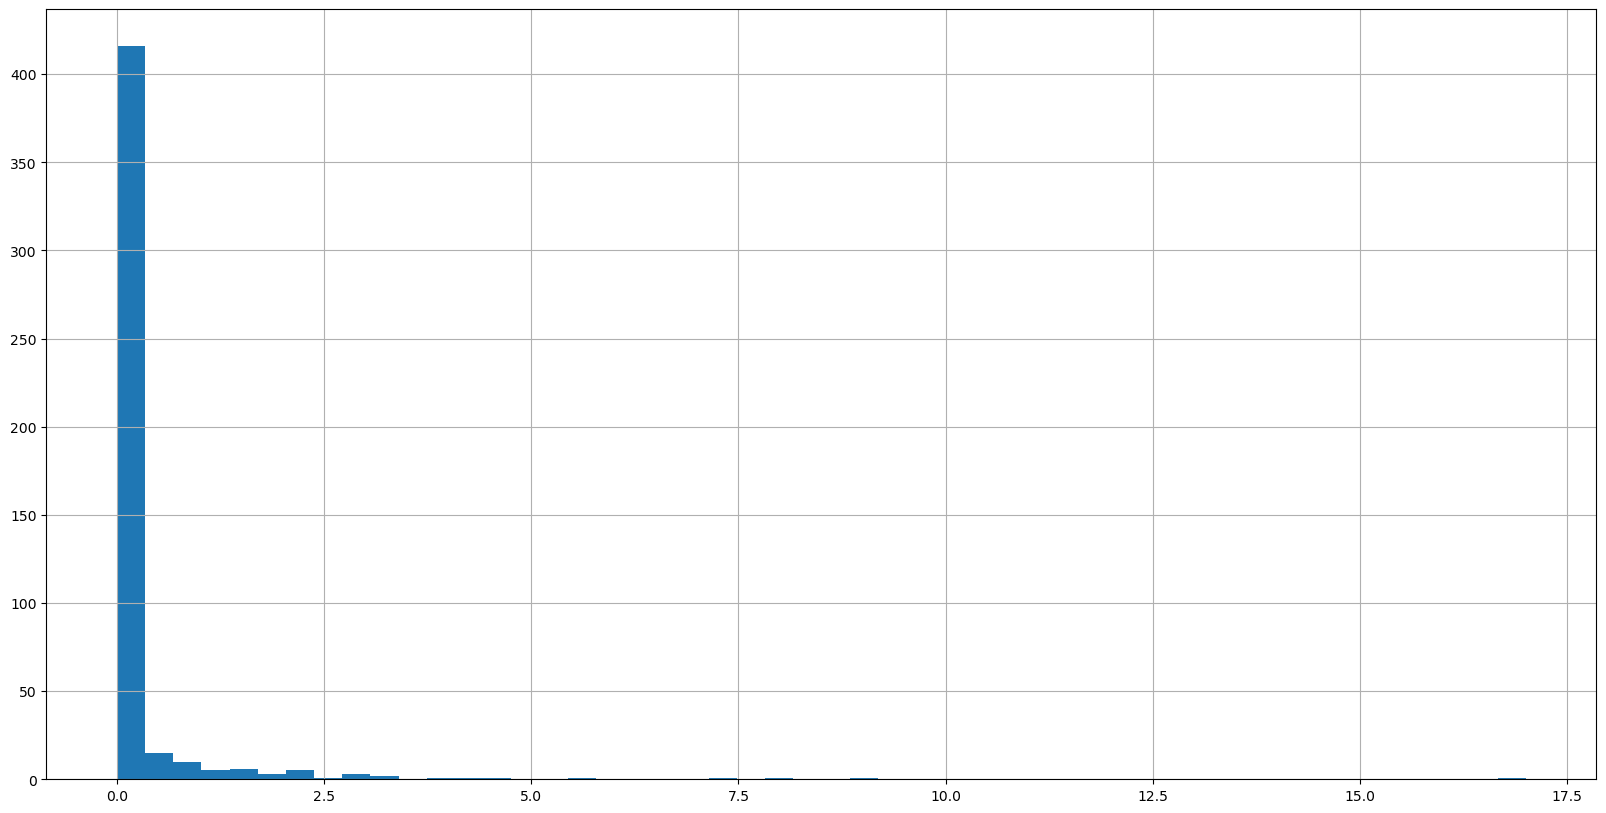

In [16]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins = 50, figsize = (20,10))

In [17]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     391
0.10      16
0.60       7
0.30       6
0.40       4
0.20       3
1.10       3
2.30       3
0.70       3
1.00       3
1.70       2
1.30       2
0.50       2
0.80       2
1.50       2
1.40       2
3.30       2
0.90       2
3.80       1
1.80       1
3.02       1
2.00       1
9.00       1
2.20       1
2.40       1
2.10       1
0.35       1
4.30       1
17.00      1
4.60       1
8.10       1
5.60       1
1.90       1
0.67       1
7.40       1
2.80       1
3.00       1
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

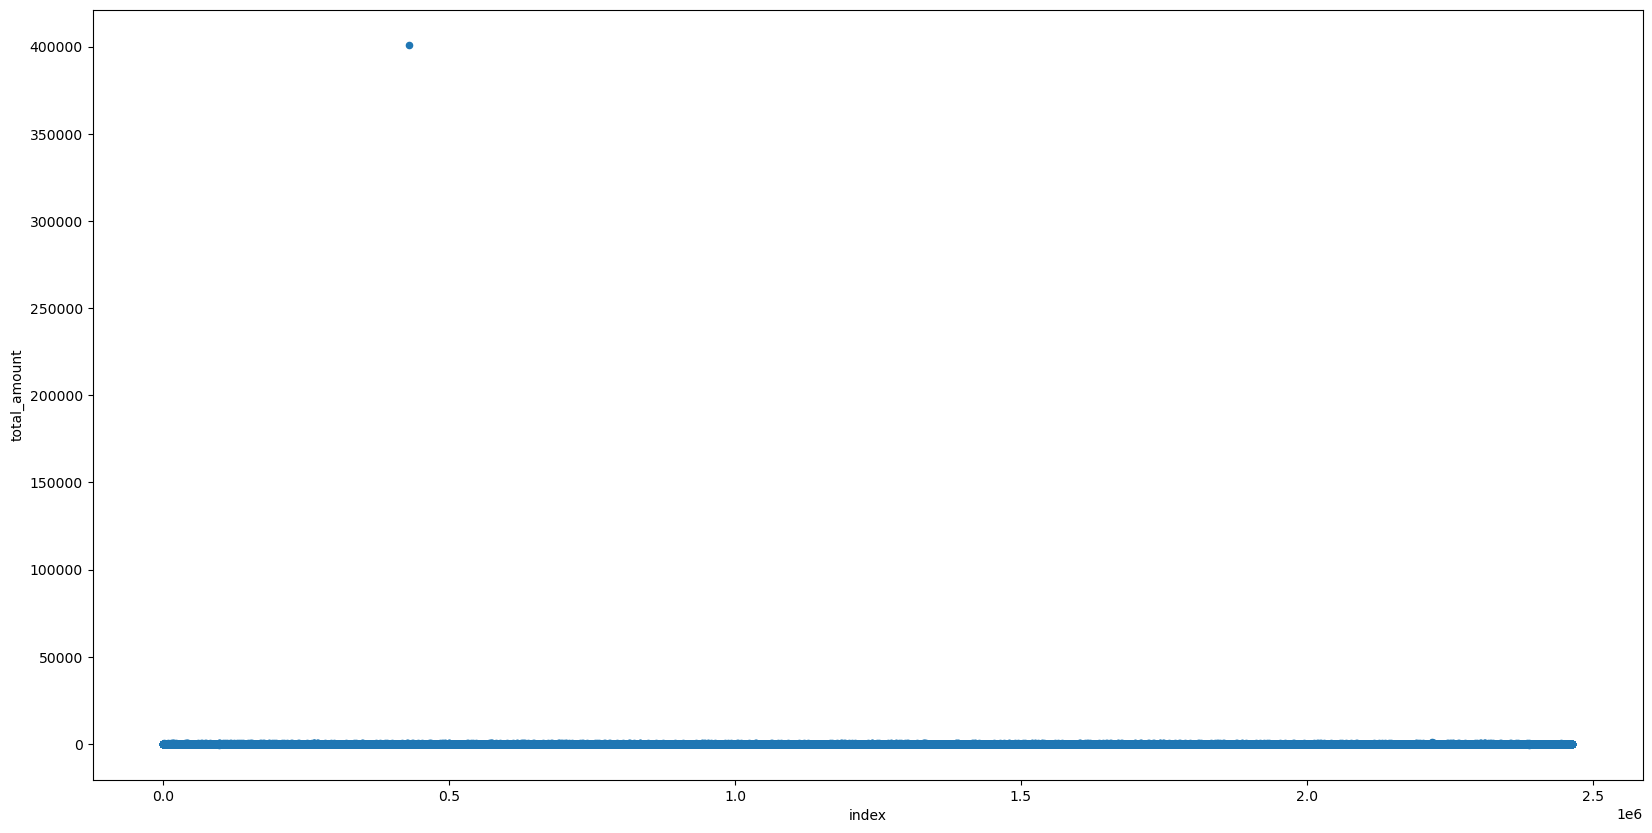

In [18]:
taxi_data.reset_index().plot(kind = 'scatter', figsize = (20,10), y = 'total_amount', x = 'index')

In [19]:
taxi_data[taxi_data['total_amount']>150].shape

(1378, 9)

In [20]:
taxi_data['total_amount'].mean

<bound method Series.mean of 0          21.95
1          13.30
2          10.56
3          11.80
4          30.30
           ...  
2463926    13.69
2463927    24.45
2463928    16.52
2463929    15.70
2463930    35.06
Name: total_amount, Length: 2463931, dtype: float64>

# 3. Data Cleaning

In [21]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount'] >= 0)&(taxi_data['total_amount'] < 150)]
print(taxi_data.shape)
taxi_data_filtered.shape

(2463931, 9)


(2449617, 9)

In [22]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71462
trip_distance                0
RatecodeID               71462
payment_type                 0
PULocationID                 0
DOLocationID                 0
total_amount                 0
dtype: int64

In [23]:
taxi_data_filtered[taxi_data_filtered['RatecodeID'].isna()].value_counts

<bound method DataFrame.value_counts of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2392428  2022-01-01 00:50:00   2022-01-01 00:54:00              NaN   
2392429  2022-01-01 00:49:24   2022-01-01 01:27:36              NaN   
2392430  2022-01-01 00:42:00   2022-01-01 00:56:00              NaN   
2392431  2022-01-01 00:40:00   2022-01-01 00:55:00              NaN   
2392432  2022-01-01 00:40:00   2022-01-01 00:52:00              NaN   
...                      ...                   ...              ...   
2463926  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN   

         trip_distance  RatecodeID  payment_type  PULocationID  DOLocationID  \
2392428           1.00     

In [24]:
print(taxi_data_filtered['passenger_count'].value_counts())
print(taxi_data_filtered['RatecodeID'].value_counts())
print(taxi_data_filtered.isna().sum())

passenger_count
1.0    1782969
2.0     340881
3.0      84018
0.0      52033
5.0      51210
4.0      35064
6.0      31960
7.0          9
8.0          8
9.0          3
Name: count, dtype: int64
RatecodeID
1.0     2284677
2.0       65758
5.0       12340
99.0       8730
3.0        3805
4.0        2829
6.0          16
Name: count, dtype: int64
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71462
trip_distance                0
RatecodeID               71462
payment_type                 0
PULocationID                 0
DOLocationID                 0
total_amount                 0
dtype: int64


In [25]:
taxi_data_filtered[taxi_data_filtered['payment_type']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
2392428,2022-01-01 00:50:00,2022-01-01 00:54:00,NaN,1.00,NaN,0,68,246,18.25
2392429,2022-01-01 00:49:24,2022-01-01 01:27:36,NaN,13.31,NaN,0,257,223,55.72
2392430,2022-01-01 00:42:00,2022-01-01 00:56:00,NaN,2.87,NaN,0,143,236,20.04
2392431,2022-01-01 00:40:00,2022-01-01 00:55:00,NaN,3.24,NaN,0,143,262,21.21
2392432,2022-01-01 00:40:00,2022-01-01 00:52:00,NaN,2.19,NaN,0,239,166,21.75
...,...,...,...,...,...,...,...,...,...
2463926,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,0,90,170,13.69
2463927,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,0,107,75,24.45
2463928,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,0,113,246,16.52
2463929,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,0,148,164,15.70


In [26]:
taxi_data_filtered['payment_type'].value_counts()

payment_type
1    1873764
2     492623
0      71462
3       8481
4       3286
5          1
Name: count, dtype: int64

In [27]:
taxi_data_filtered['passenger_count'].fillna((taxi_data_filtered['passenger_count'].median()), inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_104596\953473046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered['passenger_count'].fillna((taxi_data_filtered['passenger_count'].median()), inplace = True)


In [28]:
print(taxi_data_filtered['passenger_count'].value_counts())
print(taxi_data_filtered.isna().sum())

passenger_count
1.0    1854431
2.0     340881
3.0      84018
0.0      52033
5.0      51210
4.0      35064
6.0      31960
7.0          9
8.0          8
9.0          3
Name: count, dtype: int64
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               71462
payment_type                 0
PULocationID                 0
DOLocationID                 0
total_amount                 0
dtype: int64


In [29]:
taxi_data_filtered['RatecodeID'].fillna((taxi_data_filtered['RatecodeID'].mode()[0]), inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_104596\4291409620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered['RatecodeID'].fillna((taxi_data_filtered['RatecodeID'].mode()[0]), inplace = True)


In [30]:
print(taxi_data_filtered['RatecodeID'].value_counts())
print(taxi_data_filtered.isna().sum())

RatecodeID
1.0     2356139
2.0       65758
5.0       12340
99.0       8730
3.0        3805
4.0        2829
6.0          16
Name: count, dtype: int64
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
payment_type             0
PULocationID             0
DOLocationID             0
total_amount             0
dtype: int64


In [31]:
taxi_data_filtered['payment_type'].value_counts()

payment_type
1    1873764
2     492623
0      71462
3       8481
4       3286
5          1
Name: count, dtype: int64

In [32]:
taxi_data_filtered['payment_type'].replace(0, 6, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_104596\1944479844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered['payment_type'].replace(0, 6, inplace = True)


In [33]:
print(taxi_data_filtered['payment_type'].value_counts())
print(taxi_data_filtered['passenger_count'].value_counts())
print(taxi_data_filtered['RatecodeID'].value_counts())

payment_type
1    1873764
2     492623
6      71462
3       8481
4       3286
5          1
Name: count, dtype: int64
passenger_count
1.0    1854431
2.0     340881
3.0      84018
0.0      52033
5.0      51210
4.0      35064
6.0      31960
7.0          9
8.0          8
9.0          3
Name: count, dtype: int64
RatecodeID
1.0     2356139
2.0       65758
5.0       12340
99.0       8730
3.0        3805
4.0        2829
6.0          16
Name: count, dtype: int64


In [34]:
taxi_data_filtered[taxi_data_filtered['RatecodeID']==99].value_counts()

tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  payment_type  PULocationID  DOLocationID  total_amount
2022-01-01 00:10:40   2022-01-01 00:56:08    1.0              0.0            99.0        1             49            136           59.55           1
2022-01-23 06:53:33   2022-01-23 06:59:17    1.0              1.4            99.0        1             225           17            20.00           1
2022-01-23 05:58:22   2022-01-23 06:47:02    1.0              11.9           99.0        1             216           74            48.55           1
2022-01-23 06:13:50   2022-01-23 06:50:40    1.0              7.8            99.0        1             63            201           35.45           1
2022-01-23 06:33:09   2022-01-23 07:18:58    1.0              2.7            99.0        1             82            7             20.00           1
                                                                                                               

In [35]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['passenger_count']<=6]
print(taxi_data_filtered['passenger_count'].value_counts())

passenger_count
1.0    1854431
2.0     340881
3.0      84018
0.0      52033
5.0      51210
4.0      35064
6.0      31960
Name: count, dtype: int64


In [36]:
print(taxi_data_filtered['passenger_count'].median)
taxi_data_filtered['passenger_count'].replace(0, 1, inplace = True)
print(taxi_data_filtered['passenger_count'].value_counts())

<bound method Series.median of 0          2.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2463926    1.0
2463927    1.0
2463928    1.0
2463929    1.0
2463930    1.0
Name: passenger_count, Length: 2449597, dtype: float64>
passenger_count
1.0    1906464
2.0     340881
3.0      84018
5.0      51210
4.0      35064
6.0      31960
Name: count, dtype: int64


In [37]:
print(taxi_data_filtered[taxi_data_filtered['RatecodeID']==99]['passenger_count'].value_counts())
print(taxi_data_filtered[taxi_data_filtered['RatecodeID']==99]['trip_distance'].value_counts())
print(taxi_data_filtered[taxi_data_filtered['RatecodeID']==99]['payment_type'].value_counts())

passenger_count
1.0    8717
2.0      11
3.0       1
4.0       1
Name: count, dtype: int64
trip_distance
0.0     1569
1.6       89
1.8       85
1.7       84
2.1       84
        ... 
31.9       1
25.4       1
30.9       1
28.6       1
34.2       1
Name: count, Length: 314, dtype: int64
payment_type
1    8716
2      13
3       1
Name: count, dtype: int64


# 4. Data Preparation

In [38]:
taxi_data_prepared = taxi_data_filtered.copy()

In [39]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
payment_type                      int64
PULocationID                      int64
DOLocationID                      int64
total_amount                    float64
dtype: object

In [40]:
#taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
#taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype(np.int64)
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)

In [41]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
payment_type                     object
PULocationID                     object
DOLocationID                     object
total_amount                    float64
dtype: object

In [42]:
print(taxi_data.shape)
taxi_data_prepared.shape

(2463931, 9)


(2449597, 9)

In [43]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1.0,1,142,236,21.95
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1.0,1,236,42,13.30
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1.0,1,166,166,10.56
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1.0,2,114,68,11.80
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1.0,1,68,163,30.30


In [44]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [45]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1.0,1,142,236,21.95,2022-01-01,2022,1,1,0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1.0,1,236,42,13.30,2022-01-01,2022,1,1,0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1.0,1,166,166,10.56,2022-01-01,2022,1,1,0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1.0,2,114,68,11.80,2022-01-01,2022,1,1,0
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1.0,1,68,163,30.30,2022-01-01,2022,1,1,0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

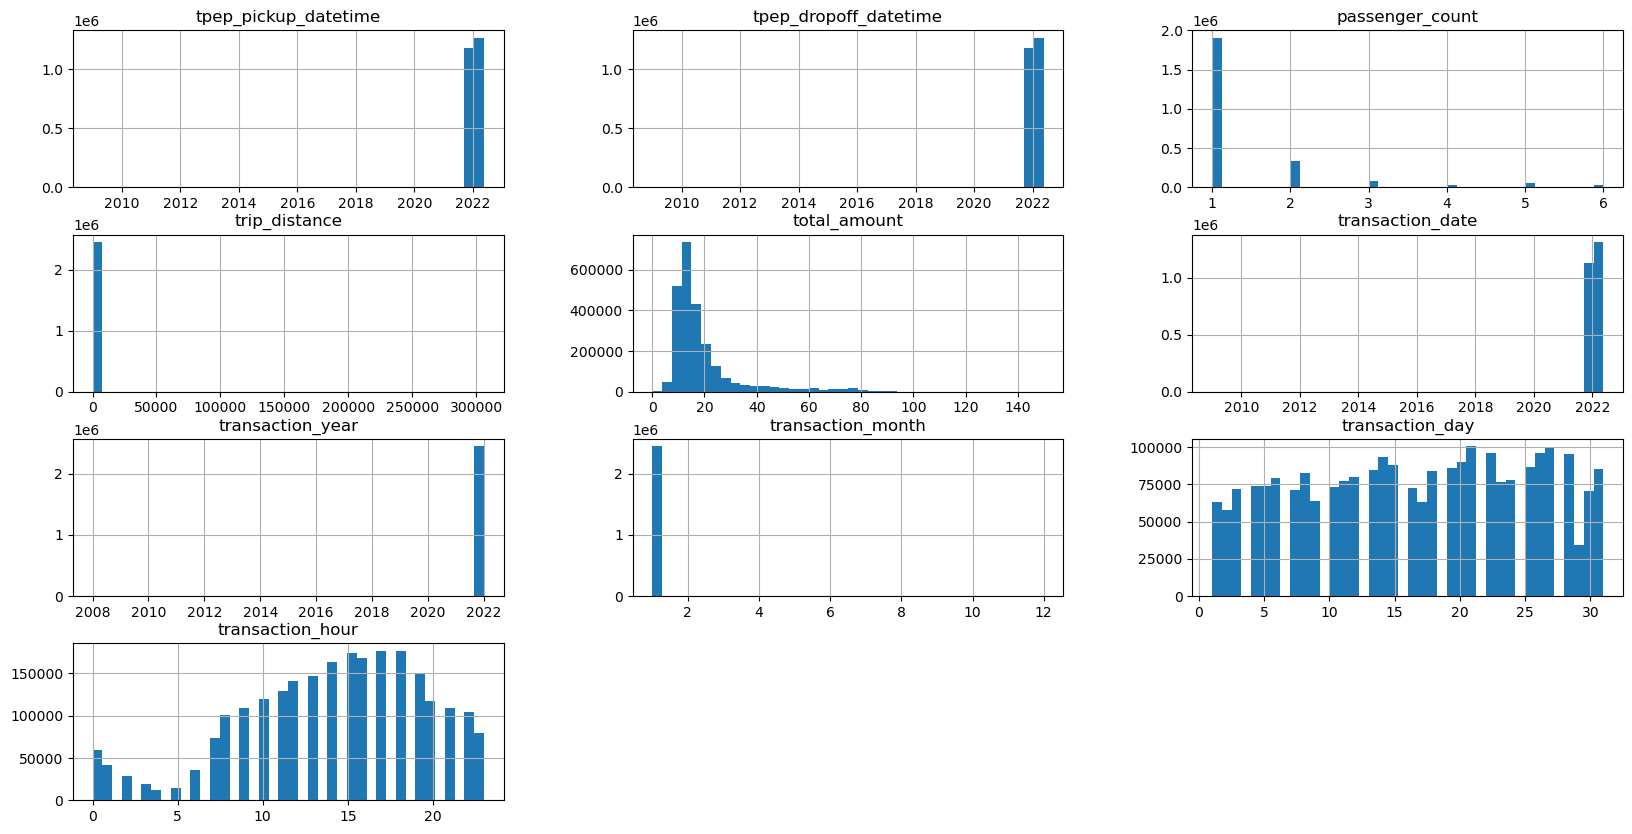

In [46]:
taxi_data_prepared.hist(figsize=(20, 10), bins=40)

In [47]:
taxi_data_prepared['transaction_year'].value_counts()

transaction_year
2022    2449559
2021         24
2009          8
2008          6
Name: count, dtype: int64

In [48]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2022]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [49]:
taxi_data_prepared['transaction_year'].value_counts()

transaction_year
2022    2449545
Name: count, dtype: int64

In [50]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [51]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2449545, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,142,2022-01-01,1,1,0,3.80,21.95
1,236,2022-01-01,1,1,0,2.10,13.30
2,166,2022-01-01,1,1,0,0.97,10.56
3,114,2022-01-01,1,1,0,1.09,11.80
4,68,2022-01-01,1,1,0,4.30,30.30


In [52]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(66786, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2022-01-01,1,1,4,0.0,40.30,1
1,1,2022-01-01,1,1,5,0.0,105.30,1
2,1,2022-01-01,1,1,7,0.0,107.83,2
3,1,2022-01-01,1,1,10,0.0,98.05,1
4,1,2022-01-01,1,1,11,0.0,105.30,2


In [53]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(66786, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2022-01-01,1,1,4,0.0,40.30,1
1,1,2022-01-01,1,1,5,0.0,105.30,1
2,1,2022-01-01,1,1,7,0.0,107.83,2
3,1,2022-01-01,1,1,10,0.0,98.05,1
4,1,2022-01-01,1,1,11,0.0,105.30,2


<Axes: >

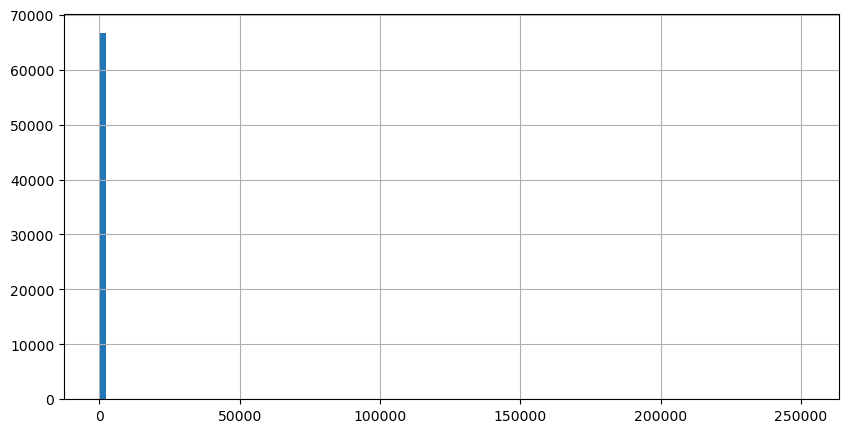

In [54]:
taxi_grouped_by_region['trip_distance'].hist(figsize = (10,5), bins = 100)

<Axes: xlabel='index', ylabel='trip_distance'>

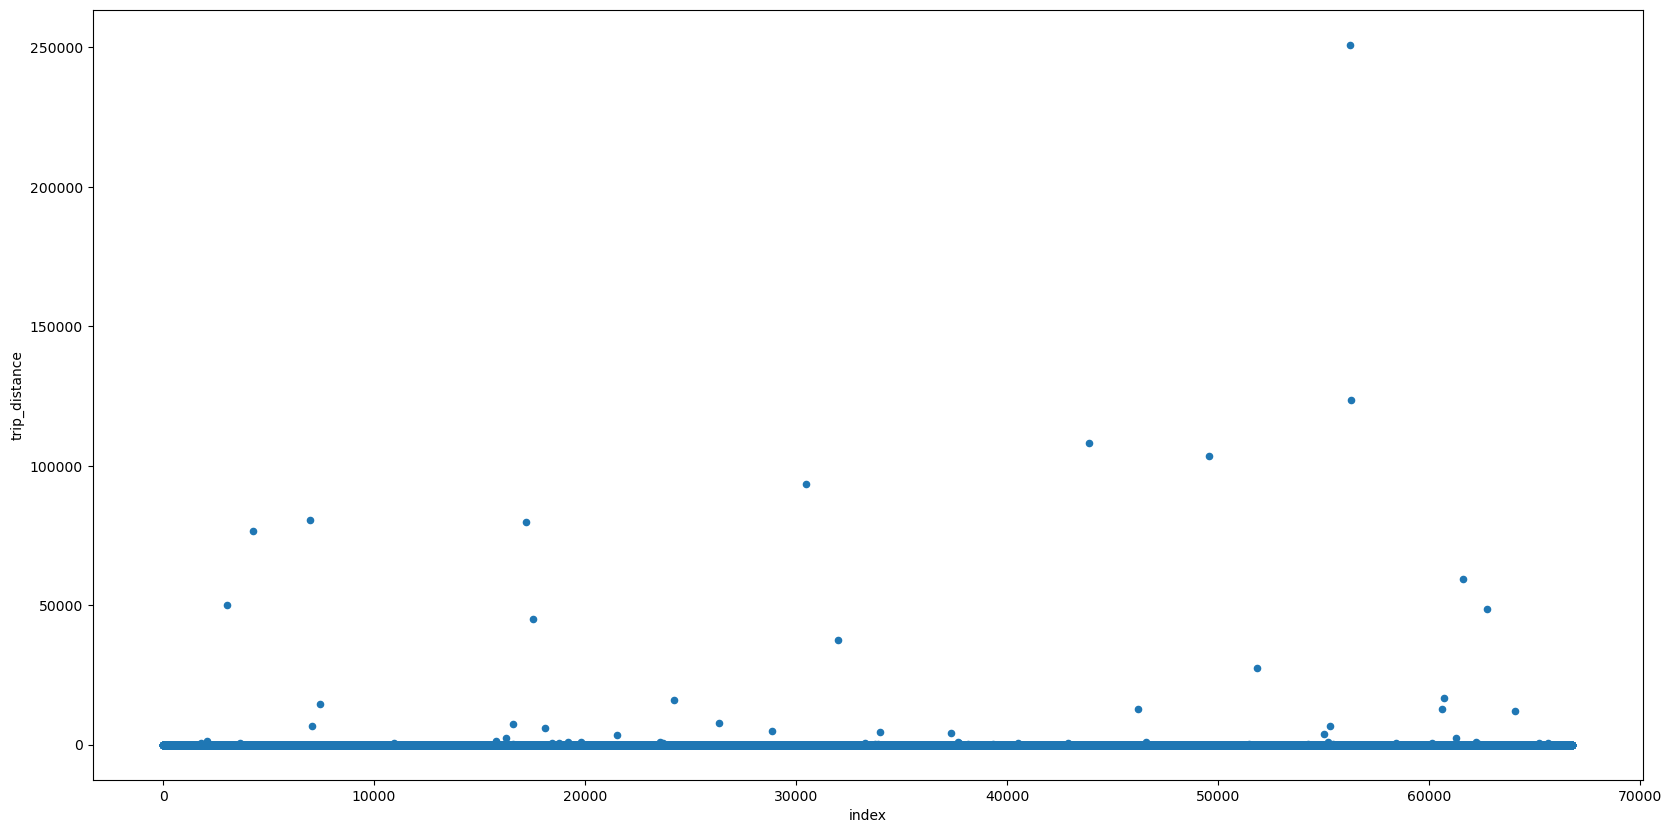

In [55]:
taxi_grouped_by_region.reset_index().plot(kind = 'scatter', figsize = (20,10), y = 'trip_distance', x = 'index')

In [56]:
taxi_grouped_by_region[taxi_grouped_by_region['trip_distance']>=200].shape

(62, 8)

In [57]:
taxi_grouped_by_region = taxi_grouped_by_region[taxi_grouped_by_region['trip_distance']<200]

<Axes: >

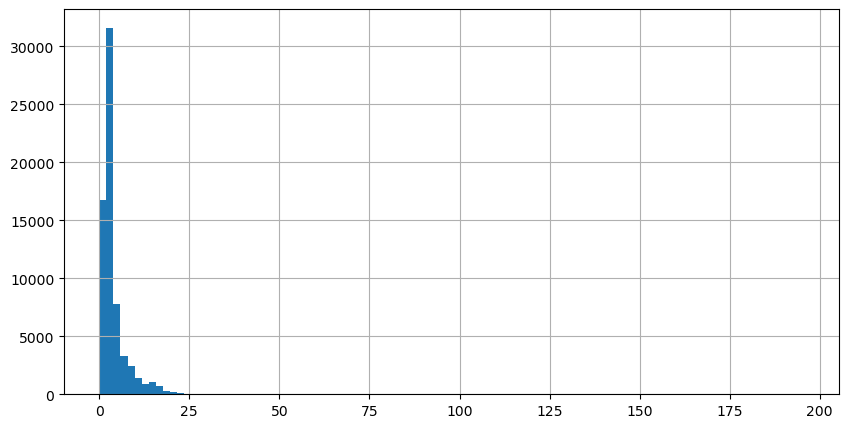

In [58]:
taxi_grouped_by_region['trip_distance'].hist(figsize = (10,5), bins = 100)

In [59]:
taxi_grouped_by_region.shape

(66724, 8)

<Axes: >

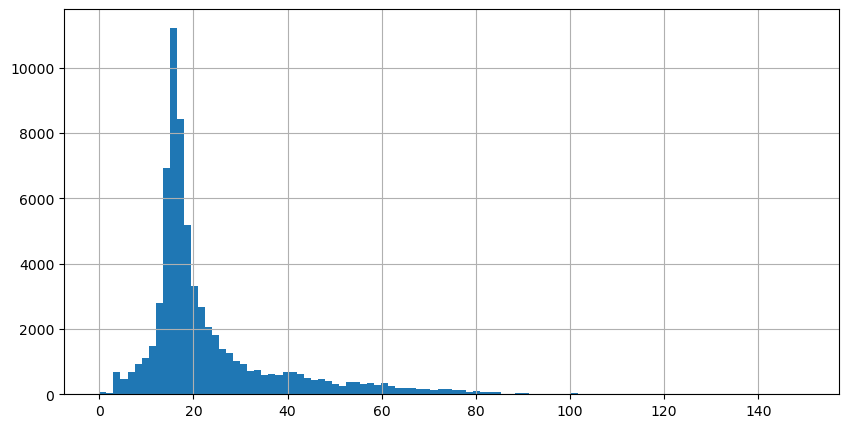

In [60]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

# 5. Benchmark Model

In [61]:
benchmark_model_data  = taxi_grouped_by_region.copy()

In [62]:
benchmark_model_data

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2022-01-01,1,1,4,0.00,40.30,1
1,1,2022-01-01,1,1,5,0.00,105.30,1
2,1,2022-01-01,1,1,7,0.00,107.83,2
3,1,2022-01-01,1,1,10,0.00,98.05,1
4,1,2022-01-01,1,1,11,0.00,105.30,2
...,...,...,...,...,...,...,...,...
66781,98,2022-01-27,1,27,6,6.50,49.00,1
66782,98,2022-01-27,1,27,10,17.10,45.00,1
66783,98,2022-01-27,1,27,11,2.42,12.36,1
66784,98,2022-01-29,1,29,0,2.80,13.56,1


In [63]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

## 5.1. Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split

X_bench = benchmark_model_data[input_features_benchmark]
y_bench = benchmark_model_data[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

## 5.2. Fit a model to a data

In [65]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=20)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=20)

## 5.3. Model evaluation

In [66]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 4.192911698085366
mean_squared_error 84.16294607422684
root_mean_squared_error 9.174036520214361
r2 0.6540448905359986


<Axes: xlabel='true', ylabel='pred'>

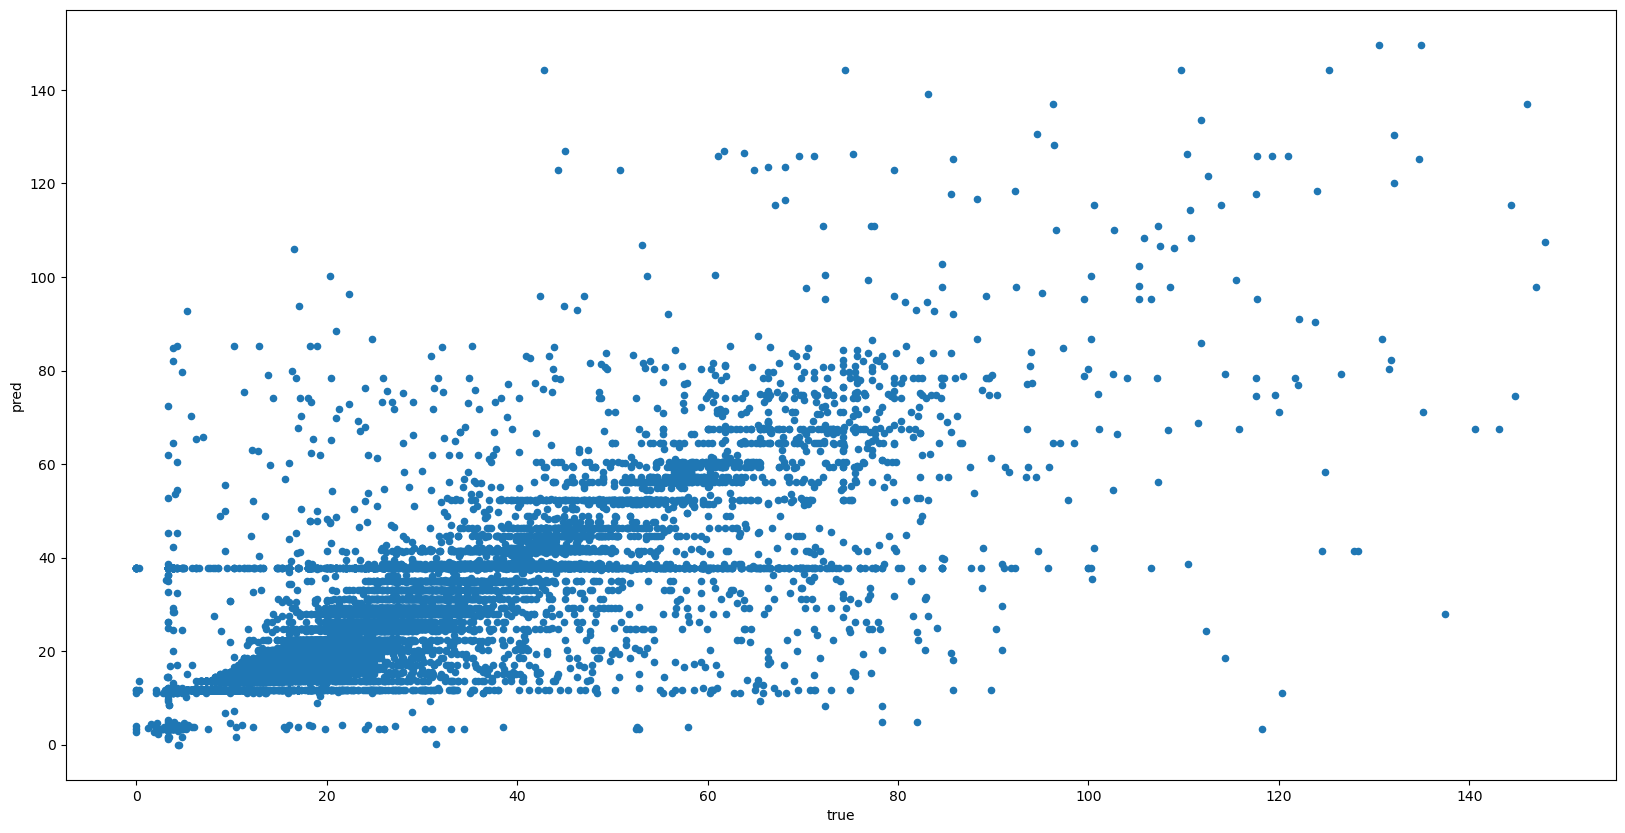

In [67]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 5.4. Fixing the model

In [68]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = benchmark_model_data[input_features_benchmark]
y_bench = benchmark_model_data[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.060141261274198
mean_squared_error 196.9603892993841
root_mean_squared_error 14.034257703896708
r2 0.1903865511071141


<Axes: xlabel='true', ylabel='pred'>

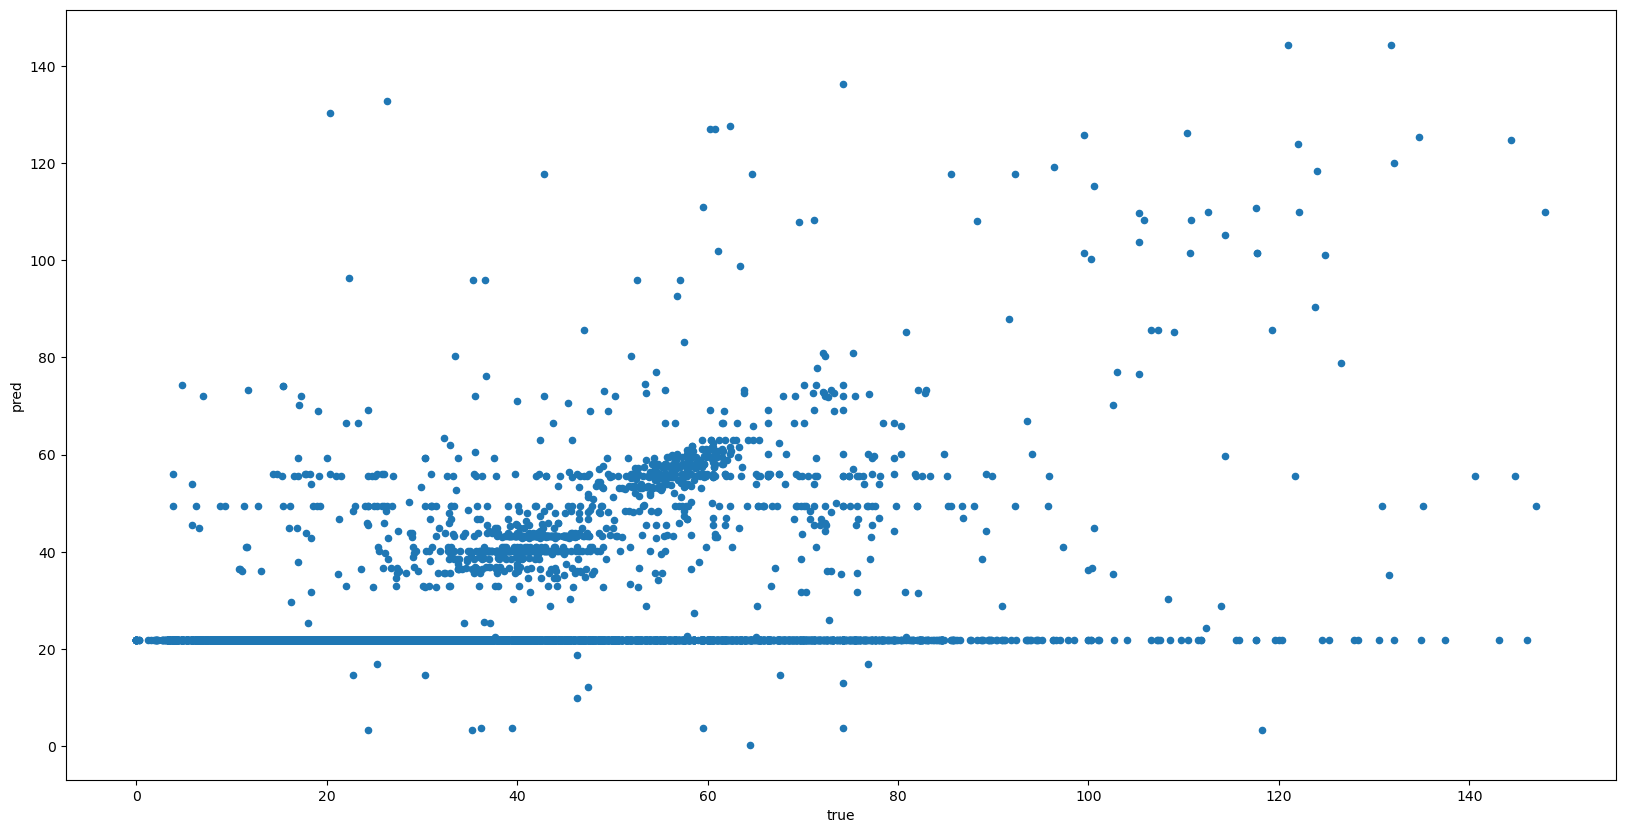

In [69]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

# 6. Feature Engineering

In [70]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2022-01-01,1,1,4,0.0,40.30,1
1,1,2022-01-01,1,1,5,0.0,105.30,1
2,1,2022-01-01,1,1,7,0.0,107.83,2
3,1,2022-01-01,1,1,10,0.0,98.05,1
4,1,2022-01-01,1,1,11,0.0,105.30,2


In [71]:
data_with_new_features = taxi_grouped_by_region.copy()

In [72]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [73]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2021',
                        end='2024').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [74]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2022-01-01,1,1,4,0.0,40.30,1,5,True,False
1,1,2022-01-01,1,1,5,0.0,105.30,1,5,True,False
2,1,2022-01-01,1,1,7,0.0,107.83,2,5,True,False
3,1,2022-01-01,1,1,10,0.0,98.05,1,5,True,False
4,1,2022-01-01,1,1,11,0.0,105.30,2,5,True,False


In [75]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [76]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2022-01-01,1,1,4,0.0,40.30,1,5,True,False,EWR
1,1,2022-01-01,1,1,5,0.0,105.30,1,5,True,False,EWR
2,1,2022-01-01,1,1,7,0.0,107.83,2,5,True,False,EWR
3,1,2022-01-01,1,1,10,0.0,98.05,1,5,True,False,EWR
4,1,2022-01-01,1,1,11,0.0,105.30,2,5,True,False,EWR


In [77]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41903
Queens           10801
Brooklyn          8989
Bronx             3275
Unknown            724
EWR                195
Staten Island      125
Name: count, dtype: int64

In [78]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [79]:
nyc_weather.dtypes

time                      object
temperature_2m (°C)      float64
precipitation (mm)       float64
rain (mm)                float64
cloudcover (%)           float64
cloudcover_low (%)       float64
cloudcover_mid (%)       float64
cloudcover_high (%)      float64
windspeed_10m (km/h)     float64
winddirection_10m (°)    float64
dtype: object

In [80]:
nyc_weather['cloudcover (%)'].value_counts()

cloudcover (%)
100.0    11539
0.0       9345
30.0      1543
1.0       1409
29.0      1108
         ...  
73.0       189
67.0       183
75.0       177
97.0       165
99.0       151
Name: count, Length: 101, dtype: int64

In [81]:
nyc_weather['precipitation (mm)'].value_counts()

precipitation (mm)
0.0     50970
0.2      1244
0.1      1226
0.3       840
0.4       613
        ...  
7.4         1
9.6         1
6.2         1
19.2        1
5.7         1
Name: count, Length: 92, dtype: int64

In [82]:
nyc_weather.isna().sum()

time                       0
temperature_2m (°C)      168
precipitation (mm)       168
rain (mm)                168
cloudcover (%)           168
cloudcover_low (%)       168
cloudcover_mid (%)       168
cloudcover_high (%)      168
windspeed_10m (km/h)     168
winddirection_10m (°)    173
dtype: int64

In [83]:
nyc_weather.shape

(59760, 10)

In [84]:
nyc_weather = nyc_weather.dropna()
nyc_weather.shape

(59587, 10)

In [85]:
nyc_weather['time'] = nyc_weather['time'].astype(str)
nyc_weather['time'] = nyc_weather['time'].str.replace('T', ' ')

In [86]:
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'] / 100

In [87]:
nyc_weather['time'] = pd.to_datetime(nyc_weather['time'], format='%Y-%m-%d %H:%M')
nyc_weather['hour'] = nyc_weather['time'].dt.hour
nyc_weather['month'] = nyc_weather['time'].dt.month
nyc_weather['day'] = nyc_weather['time'].dt.day
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,2016-01-01 00:00:00,7.6,0.0,0.0,0.69,53.0,0.0,72.0,10.0,296.0,0,1,1
1,2016-01-01 01:00:00,7.5,0.0,0.0,0.20,4.0,0.0,56.0,9.8,287.0,1,1,1
2,2016-01-01 02:00:00,7.1,0.0,0.0,0.32,3.0,0.0,99.0,9.7,285.0,2,1,1
3,2016-01-01 03:00:00,6.6,0.0,0.0,0.35,5.0,0.0,100.0,9.2,281.0,3,1,1
4,2016-01-01 04:00:00,6.3,0.0,0.0,0.34,4.0,0.0,100.0,9.1,279.0,4,1,1


In [88]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(466975, 25)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,...,0.0,0.34,4.0,0.0,100.0,9.1,279.0,4,1,1
1,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,...,0.0,0.77,2.0,92.0,67.0,16.5,216.0,4,1,1
2,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,...,0.0,0.00,0.0,0.0,0.0,14.3,309.0,4,1,1
3,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,...,5.6,1.00,100.0,100.0,100.0,14.0,136.0,4,1,1
4,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,...,0.0,0.23,3.0,34.0,0.0,13.4,264.0,4,1,1


In [89]:
nyc_taxi_with_weather.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
transaction_week_day              int32
weekend                            bool
is_holiday                         bool
Borough                          object
time                     datetime64[ns]
temperature_2m (°C)             float64
precipitation (mm)              float64
rain (mm)                       float64
cloudcover (%)                  float64
cloudcover_low (%)              float64
cloudcover_mid (%)              float64
cloudcover_high (%)             float64
windspeed_10m (km/h)            float64
winddirection_10m (°)           float64
hour                              int32
month                             int32
day                               int32


In [90]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['rain (mm)', 'winddirection_10m (°)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)','hour','month','day'], axis=1)

In [91]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,time,temperature_2m (°C),precipitation (mm),cloudcover (%),windspeed_10m (km/h)
0,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2016-01-01 04:00:00,6.3,0.0,0.34,9.1
1,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2017-01-01 04:00:00,6.1,0.0,0.77,16.5
2,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2018-01-01 04:00:00,-12.2,0.0,0.00,14.3
3,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2019-01-01 04:00:00,7.9,5.6,1.00,14.0
4,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2020-01-01 04:00:00,5.0,0.0,0.23,13.4


In [92]:
print(nyc_taxi_with_weather['precipitation (mm)'].value_counts())

precipitation (mm)
0.0    408629
0.1      9879
0.2      7472
0.3      6315
0.4      4955
0.5      3579
0.6      2748
0.7      2537
0.8      2327
0.9      2055
1.6      1379
1.1      1347
1.3      1273
1.7      1107
1.0      1082
2.8       914
1.5       839
1.2       778
2.0       719
1.8       672
2.7       591
2.3       463
2.4       446
2.6       430
2.1       406
2.5       361
3.1       356
4.1       300
3.3       283
2.2       269
1.4       260
2.9       227
6.0       204
3.2       204
7.2       176
1.9       167
3.5       162
4.3       111
7.9       108
5.5       105
5.6       104
3.0        98
6.9        97
3.4        96
5.1        88
4.8        75
4.2        65
3.7        60
4.0        57
Name: count, dtype: int64


In [93]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,time,temperature_2m (°C),precipitation (mm),cloudcover (%),windspeed_10m (km/h)
0,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2016-01-01 04:00:00,6.3,0.0,0.34,9.1
1,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2017-01-01 04:00:00,6.1,0.0,0.77,16.5
2,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2018-01-01 04:00:00,-12.2,0.0,0.00,14.3
3,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2019-01-01 04:00:00,7.9,5.6,1.00,14.0
4,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2020-01-01 04:00:00,5.0,0.0,0.23,13.4


In [94]:
nyc_taxi_with_weather[nyc_taxi_with_weather['Borough'].isna()]['PULocationID'].value_counts()

PULocationID
265    4983
Name: count, dtype: int64

In [95]:
nyc_taxi_with_weather['Borough'].fillna('Outside of New York', inplace=True)
nyc_taxi_with_weather['Borough'].value_counts()

Borough
Manhattan              293262
Queens                  75596
Brooklyn                62905
Bronx                   22922
Unknown                  5067
Outside of New York      4983
EWR                      1365
Staten Island             875
Name: count, dtype: int64

In [96]:
nyc_taxi_with_weather[nyc_taxi_with_weather['Borough']=='Unknown']['PULocationID'].value_counts()

PULocationID
264    5067
Name: count, dtype: int64

In [97]:
nyc_taxi_with_weather[nyc_taxi_with_weather['Borough']=='Unknown']

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,time,temperature_2m (°C),precipitation (mm),cloudcover (%),windspeed_10m (km/h)
331353,264,2022-01-01,1,1,0,3.748125,21.778437,32,5,True,False,Unknown,2016-01-01 00:00:00,7.6,0.0,0.69,10.0
331354,264,2022-01-01,1,1,0,3.748125,21.778437,32,5,True,False,Unknown,2017-01-01 00:00:00,5.7,0.0,0.90,19.2
331355,264,2022-01-01,1,1,0,3.748125,21.778437,32,5,True,False,Unknown,2018-01-01 00:00:00,-11.1,0.0,0.00,9.4
331356,264,2022-01-01,1,1,0,3.748125,21.778437,32,5,True,False,Unknown,2019-01-01 00:00:00,6.4,1.8,1.00,14.4
331357,264,2022-01-01,1,1,0,3.748125,21.778437,32,5,True,False,Unknown,2020-01-01 00:00:00,4.7,0.0,0.78,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336415,264,2022-01-31,1,31,23,8.283333,38.430833,24,0,False,False,Unknown,2018-01-31 23:00:00,-1.4,0.0,0.29,10.5
336416,264,2022-01-31,1,31,23,8.283333,38.430833,24,0,False,False,Unknown,2019-01-31 23:00:00,-9.3,0.0,0.00,13.2
336417,264,2022-01-31,1,31,23,8.283333,38.430833,24,0,False,False,Unknown,2020-01-31 23:00:00,4.6,0.0,1.00,7.5
336418,264,2022-01-31,1,31,23,8.283333,38.430833,24,0,False,False,Unknown,2021-01-31 23:00:00,-4.5,0.1,1.00,11.6


In [98]:
nyc_taxi_with_weather.isna().sum()

PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_of_transactions    0
transaction_week_day     0
weekend                  0
is_holiday               0
Borough                  0
time                     0
temperature_2m (°C)      0
precipitation (mm)       0
cloudcover (%)           0
windspeed_10m (km/h)     0
dtype: int64

# 7. Model Training

In [99]:
data_for_model = nyc_taxi_with_weather.copy()

In [100]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature_2m (°C)', 'windspeed_10m (km/h)', 'cloudcover (%)',
       'precipitation (mm)']
target_feature = 'total_amount'

In [101]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.1. Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [103]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.311675332076389
mean_squared_error 148.18918870677706
root_mean_squared_error 12.173298185240393
r2 0.39096704176437436


<Axes: xlabel='true', ylabel='pred'>

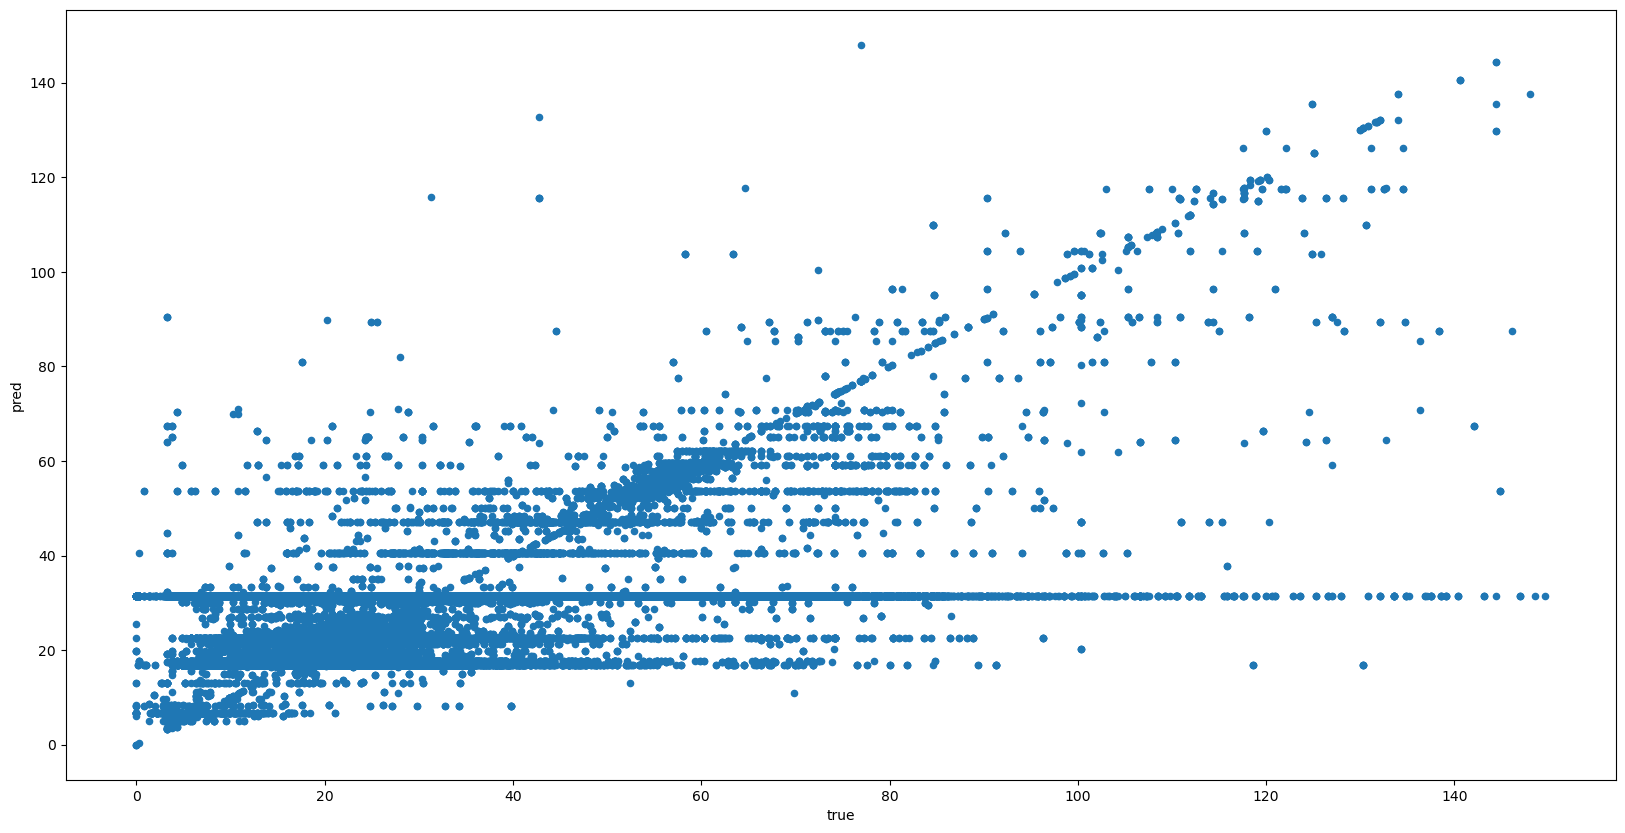

In [104]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### Overfit

In [105]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [106]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [107]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.340517e+01,13.474994
1,5,1.276472e+01,12.873993
2,8,1.231694e+01,12.454840
3,10,1.201762e+01,12.173406
4,15,1.105023e+01,11.289240
5,20,1.005711e+01,10.461028
6,30,8.113971e+00,9.055897
7,50,4.664529e+00,6.887597
8,70,1.484733e+00,5.565272
9,100,1.361483e-15,5.476359


Text(0, 0.5, 'root mean squared error')

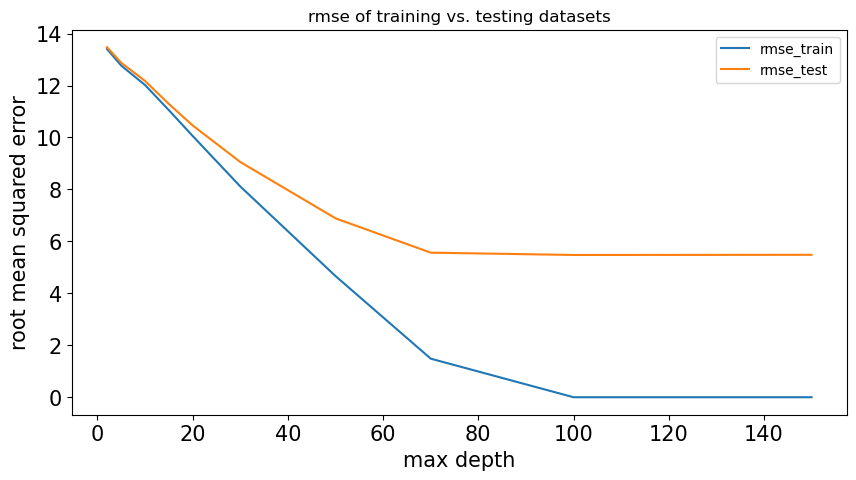

In [108]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

## 7.2. Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 2.862511660951519
mean_squared_error 30.68497174613018
root_mean_squared_error 5.539401749839976
r2 0.8738898614736286


<Axes: xlabel='true', ylabel='pred'>

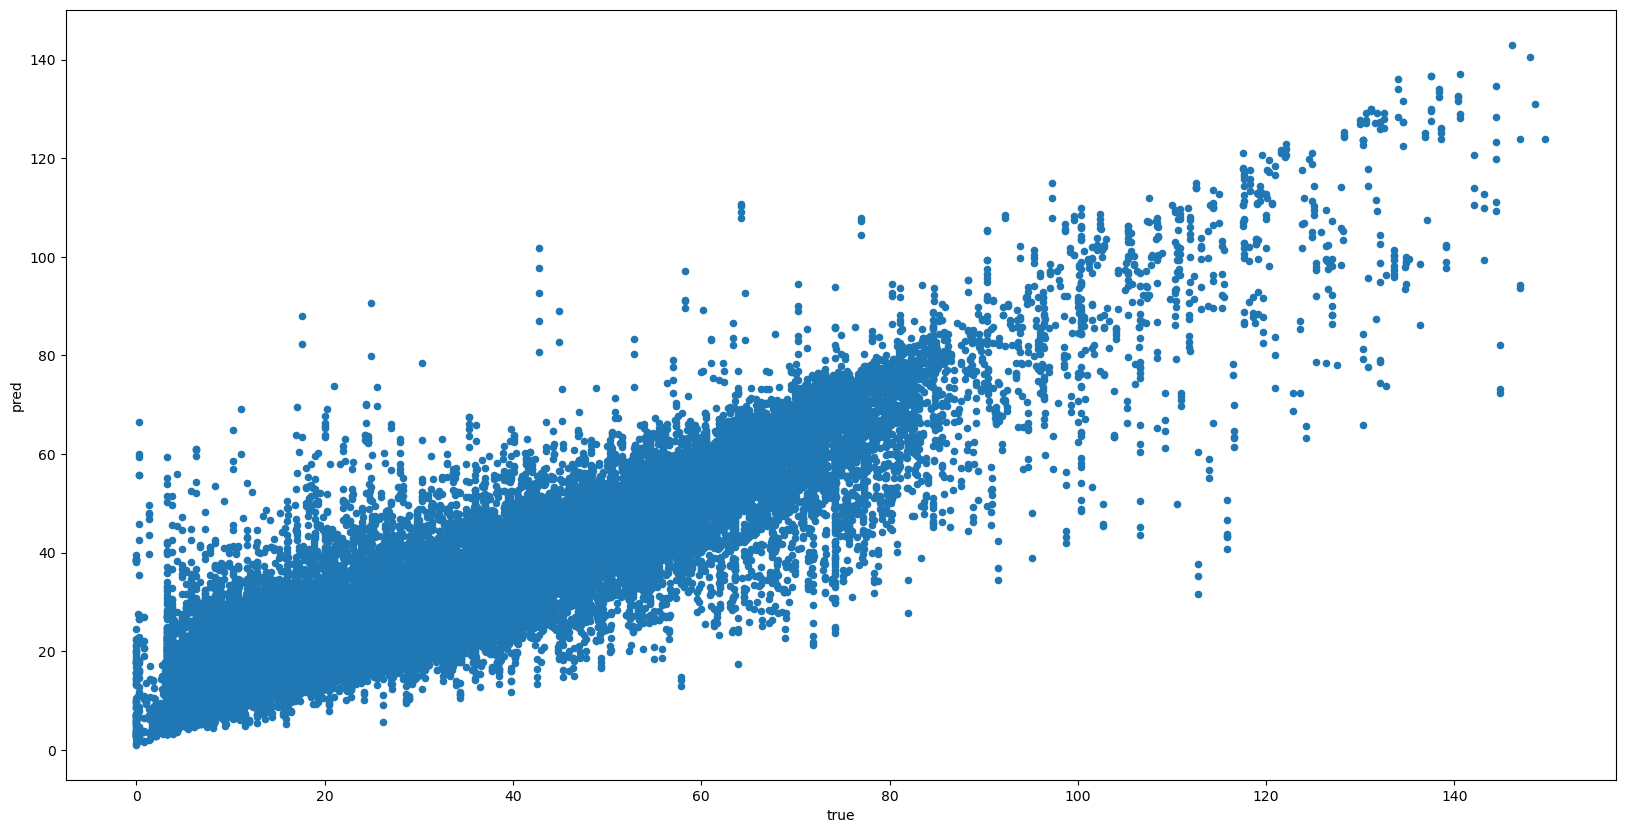

In [121]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 7.3. Gradient Boost

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor(max_depth=10)
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10)

In [123]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 5.848758530761044
mean_squared_error 94.50486591583775
root_mean_squared_error 9.721361320094926
r2 0.6116006939597234


<Axes: xlabel='true', ylabel='pred'>

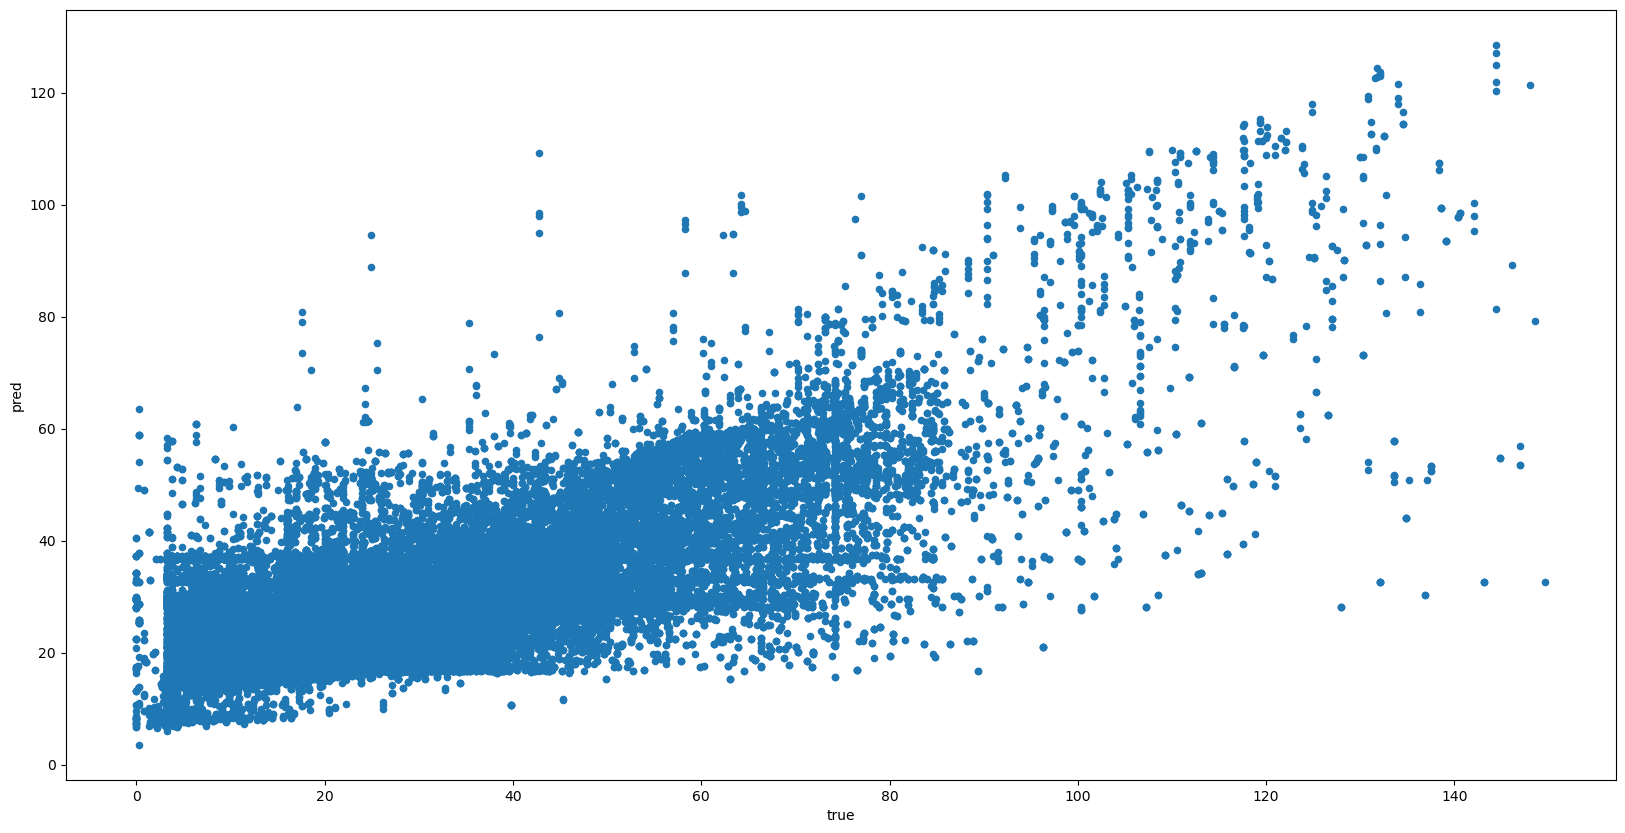

In [124]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

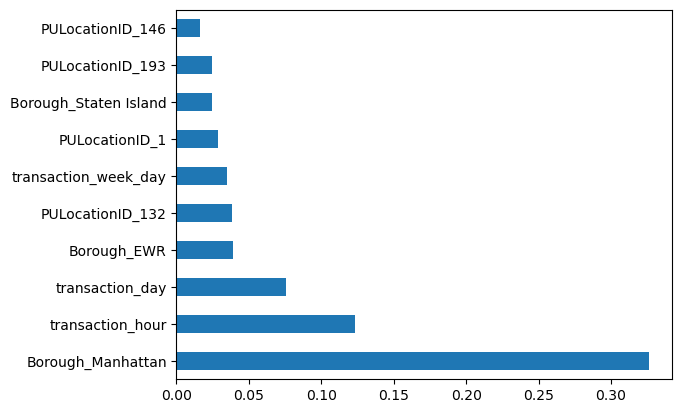

In [125]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

# 8. Tuning

## 8.1. Best Parameters

In [126]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [127]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [128]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [129]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,960.757643,13.325612,39.066437,0.850507,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.639457,0.633630,0.630378,0.634489,0.003756,3
1,324.707642,1.761883,8.175870,0.271576,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.438754,0.437801,0.437889,0.438148,0.000430,9
2,419.229751,3.745545,8.381732,0.521448,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.436965,0.438541,0.440188,0.438565,0.001316,8
3,5855.391729,104.522603,20.234576,0.697074,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.483893,0.490562,0.482136,0.485530,0.003629,7
4,15184.189020,138.261350,58.376942,7.246898,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.548892,0.559041,0.548888,0.552274,0.004785,5
5,5815.213913,31.047214,731.563362,13.558379,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.655308,0.651839,0.648401,0.651850,0.002820,2
6,949.060701,6.973175,24.243237,1.185741,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.331668,0.334315,0.334091,0.333358,0.001199,10
7,3716.252163,50.468074,159.963288,1.811330,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.521095,0.519977,0.522059,0.521043,0.000851,6
8,19140.536325,191.431452,94.029031,6.214010,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.645910,0.656467,0.655922,0.652766,0.004853,1
9,2226.785507,10.444205,90.839912,6.048344,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.619532,0.615842,0.615260,0.616878,0.001892,4


In [131]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

best = RandomForestRegressor(n_estimators=200,min_samples_split= 5,
min_samples_leaf= 1,
max_features= 'sqrt',
max_depth= 100,
bootstrap= False)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  647.7028183937073  seconds
mean_absolute_error 5.011479514876847
mean_squared_error 77.19591444094787
root_mean_squared_error 8.786120556932273
r2 0.6827376103077036


<Axes: xlabel='true', ylabel='pred'>

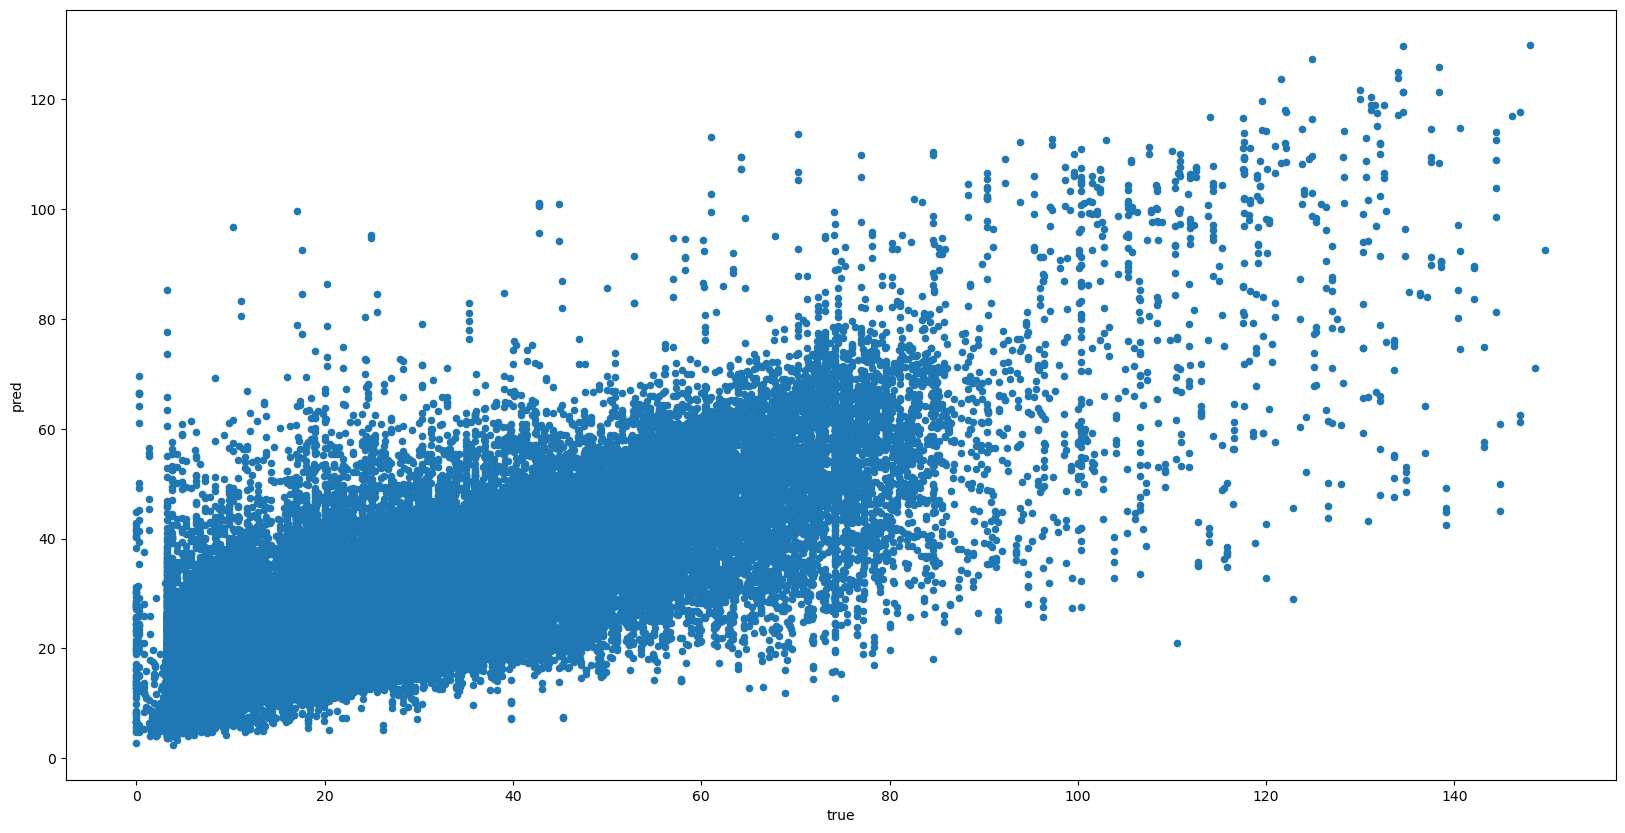

In [132]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

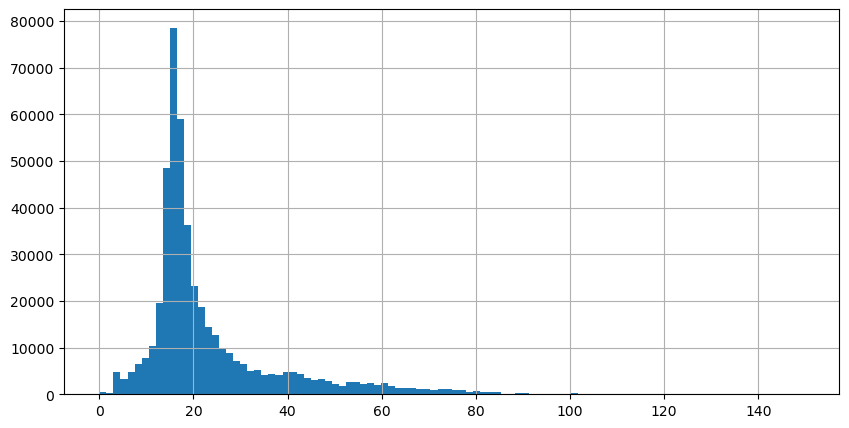

In [133]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [147]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_class['total_amount'].apply(lambda x: 'low' if x<=18 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,time,temperature_2m (°C),precipitation (mm),cloudcover (%),windspeed_10m (km/h),earning_class,earning_class_binary
0,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2016-01-01 04:00:00,6.3,0.0,0.34,9.1,high,1
1,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2017-01-01 04:00:00,6.1,0.0,0.77,16.5,high,1
2,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2018-01-01 04:00:00,-12.2,0.0,0.00,14.3,high,1
3,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2019-01-01 04:00:00,7.9,5.6,1.00,14.0,high,1
4,1,2022-01-01,1,1,4,0.0,40.3,1,5,True,False,EWR,2020-01-01 04:00:00,5.0,0.0,0.23,13.4,high,1


In [148]:
nyc_class['earning_class'].value_counts()

earning_class
low     246024
high    220951
Name: count, dtype: int64

In [149]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature_2m (°C)', 'windspeed_10m (km/h)', 'cloudcover (%)',
       'precipitation (mm)']
target_feature = 'earning_class_binary'

In [150]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [151]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[69101 12004]
 [13172 59825]]
accuracy 0.8366276881545989
precision 0.8328808698436565
recall 0.8195542282559557


<Axes: >

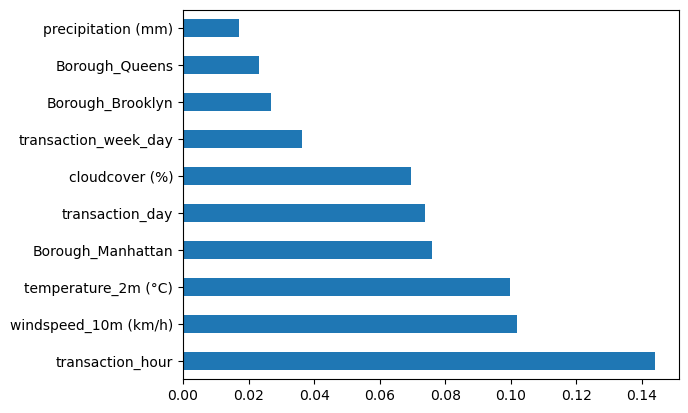

In [153]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))